In [ ]:
import pandas as pd
df=pd.read_csv('/content/StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
# Dataset overview
df.info()
df.describe()
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


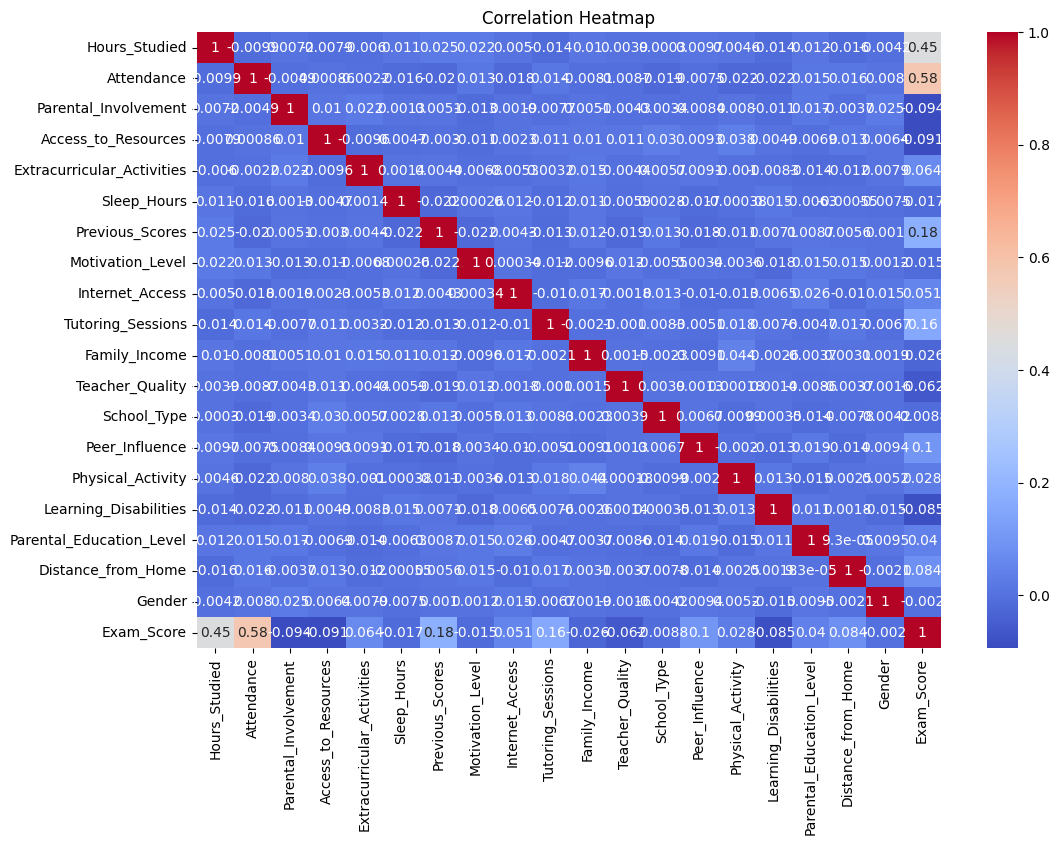

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


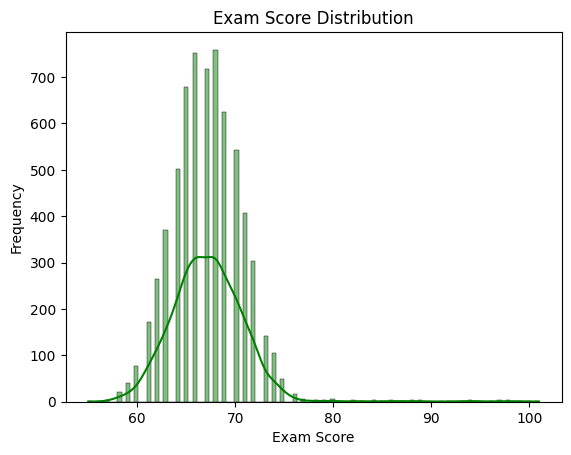

In [ ]:
# Distribution of Exam Score
sns.histplot(df['Exam_Score'], kde=True, color='green')
plt.title("Exam Score Distribution")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()


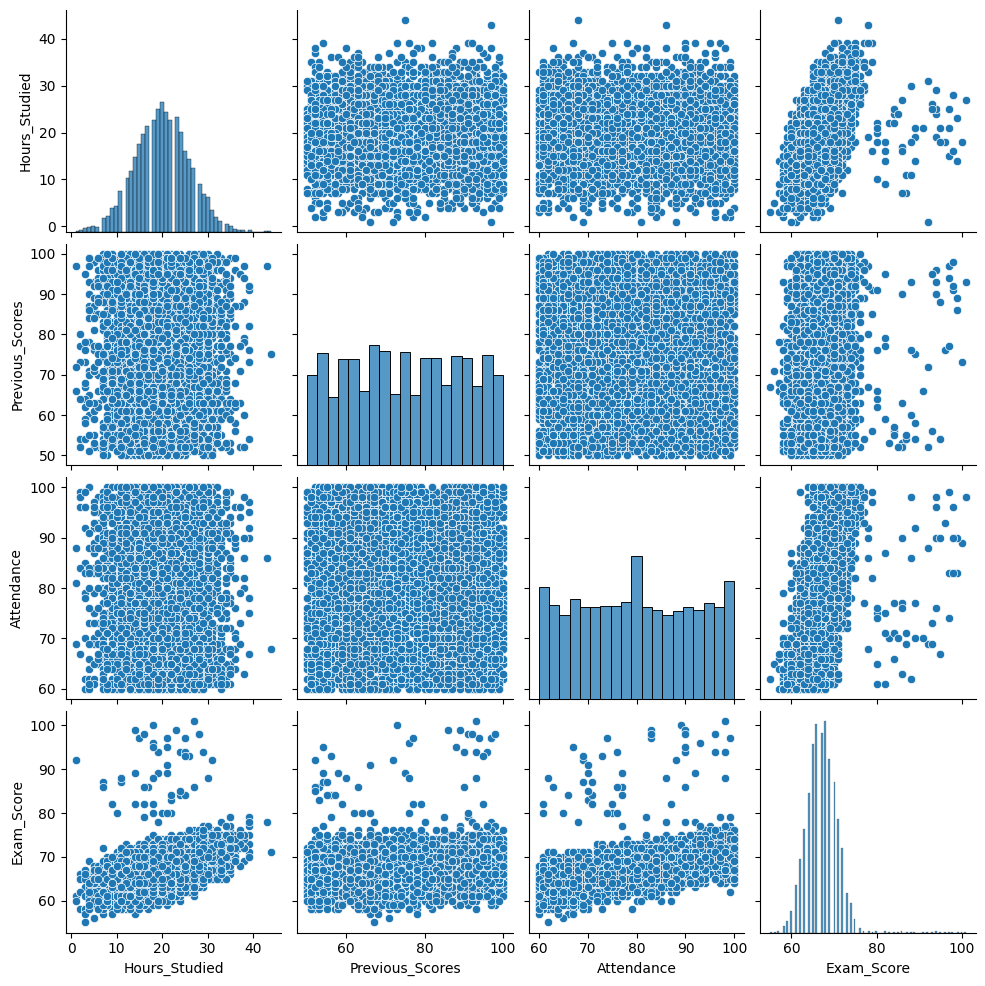

In [ ]:
# Pairplot of selected features
sns.pairplot(df[['Hours_Studied', 'Previous_Scores', 'Attendance', 'Exam_Score']])
plt.show()


In [ ]:
# Select independent features and target variable
X = df[['Hours_Studied', 'Previous_Scores', 'Attendance']]
y = df['Exam_Score']


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE: 1.59
RMSE: 2.66
R2 Score: 0.50


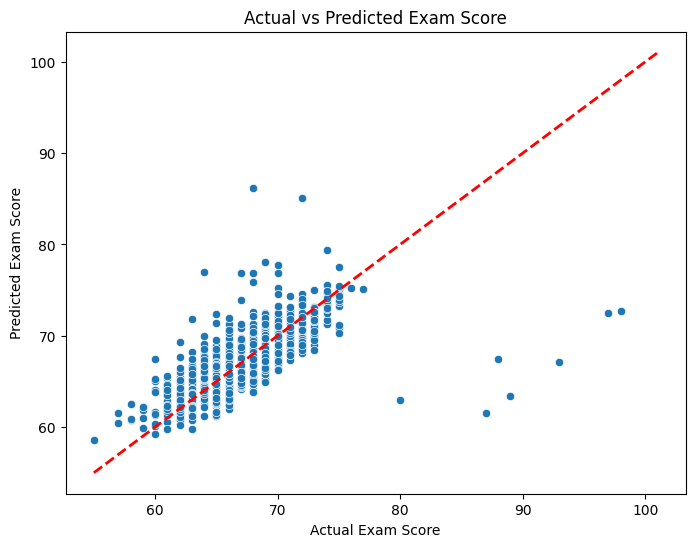

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Score")
plt.show()


/tmp/ipython-input-13-4102693063.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


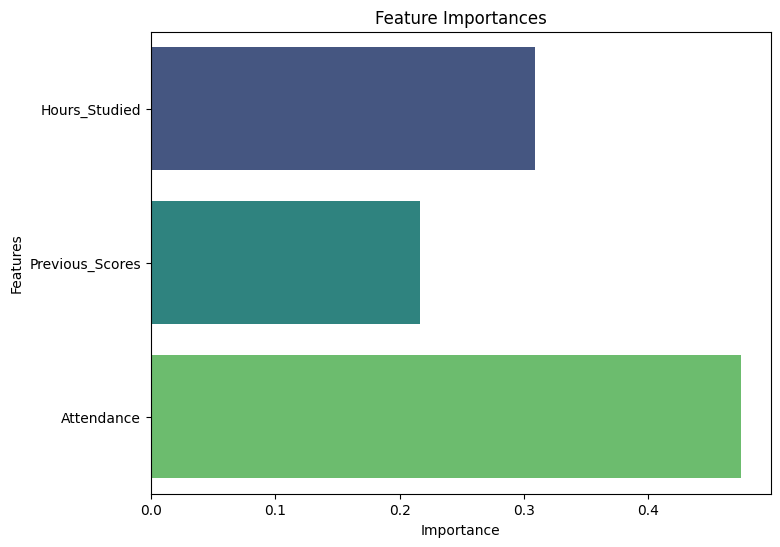

In [ ]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [ ]:
import joblib

# Save model
joblib.dump(model, 'student_score_model.pkl')
print("Model saved as student_score_model.pkl")


Model saved as student_score_model.pkl


In [ ]:
from google.colab import files
files.download('student_score_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

First 5 rows of dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Qu

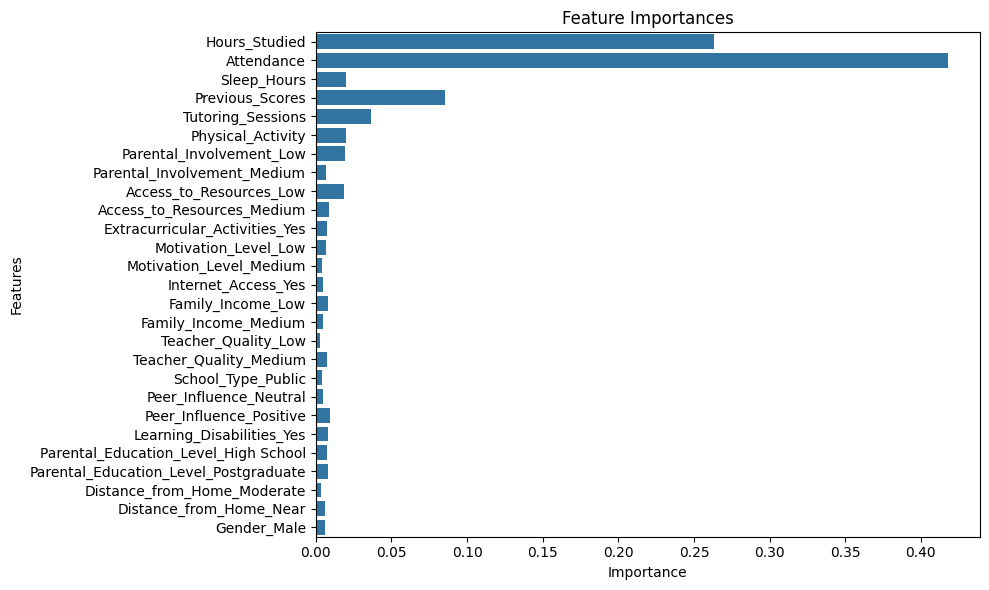

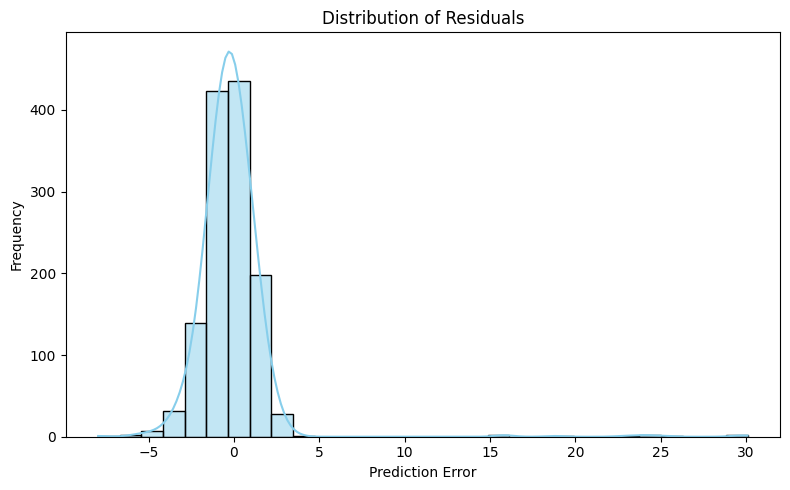

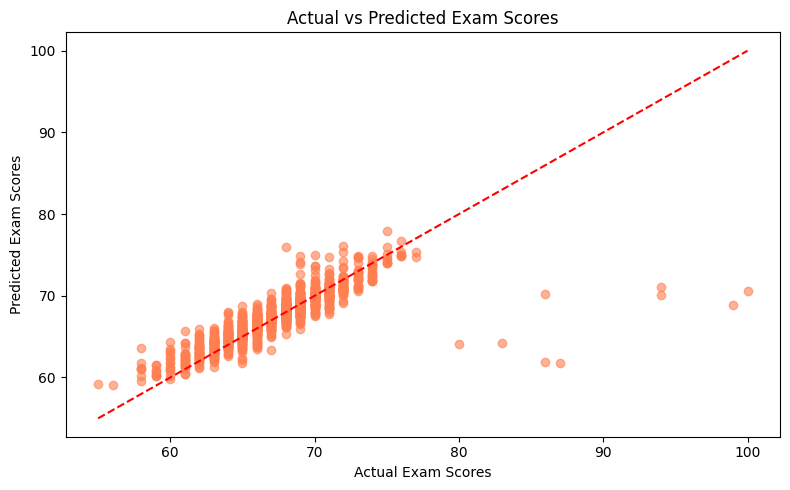

In [ ]:
# 📌 Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 Step 2: Load the dataset
df = pd.read_csv('/content/StudentPerformanceFactors.csv')  # Replace with your actual path or upload via Colab
print("First 5 rows of dataset:")
print(df.head())

# 📌 Step 3: Preprocess the data
df.dropna(inplace=True)  # Drop missing values

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 📌 Step 4: Define features and target
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# 📌 Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 6: Train initial Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# 📌 Step 7: Evaluate initial model
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nInitial Model Performance:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R2 Score:", round(r2, 2))

# 📌 Step 8: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=3, scoring='r2', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)
print("\nBest Parameters Found:", grid_search.best_params_)

# 📌 Step 9: Evaluate tuned model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("\nTuned Model Performance:")
print("MAE:", round(mae_best, 2))
print("RMSE:", round(rmse_best, 2))
print("R2 Score:", round(r2_best, 2))

# 📌 Step 10: Feature Importance Plot
importances = best_rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# 📌 Step 11: Residual Plot
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 📌 Step 12: Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_best, color='coral', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.tight_layout()
plt.show()


In [ ]:
import pickle
from google.colab import files

# Save model to .pkl file
with open('student_exam_score_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Download the .pkl file
files.download('student_exam_score_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📌 Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# 📌 Step 2: Load the dataset
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
print("First 5 rows of dataset:")
print(df.head())

# 📌 Step 3: Preprocess the data
df.dropna(inplace=True)
df_encoded = pd.get_dummies(df, drop_first=True)

# 📌 Step 4: Define features and target
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# 📌 Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 6: Train initial Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# 📌 Step 7: Evaluate initial model
y_pred = rf.predict(X_test)
print("\nInitial Model Performance:")
print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R2 Score:", round(r2_score(y_test, y_pred), 2))

# 📌 Step 8: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 📌 Step 9: Evaluate tuned model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("\nTuned Model Performance:")
print("MAE:", round(mean_absolute_error(y_test, y_pred_best), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_best)), 2))
print("R2 Score:", round(r2_score(y_test, y_pred_best), 2))

# 📌 Step 10: Save model
with open("student_exam_score_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

# 📌 Step 11: Save feature columns for prediction
feature_columns = list(X.columns)
with open("model_features.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

First 5 rows of dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Qu

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from math import sqrt

# Load dataset
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
print("Dataset loaded. Shape:", df.shape)

# Separate features and target
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [5, 10, 20]
}

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluation
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))  # Fixed for older sklearn versions
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 2))

# Save model to .pkl
joblib.dump(best_model, 'student_score_predictor.pkl')
print("\nModel saved to 'student_score_predictor.pkl'")


Dataset loaded. Shape: (6607, 20)
Best Parameters: {'regressor__max_depth': 20, 'regressor__n_estimators': 200}

Model Evaluation:
MAE: 1.08
RMSE: 2.15
R² Score: 0.67

Model saved to 'student_score_predictor.pkl'


In [ ]:
from google.colab import files
files.download('student_score_predictor.pkl')

FileNotFoundError: Cannot find file: student_score_predictor.pkl

In [ ]:
joblib.dump(best_model, 'student_score_predictor.pkl')


['student_score_predictor.pkl']

In [ ]:
import os
print('student_score_predictor.pkl' in os.listdir())

True


In [ ]:
from google.colab import files
files.download('student_score_predictor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# 📊 Load Dataset (Add your own extended dataset here)
data = pd.DataFrame({
    'hours_studied': [1.5, 3.0, 5.5, 7.0, 2.5, 6.5, 4.5, 8.0, 3.5, 1.0],
    'previous_score': [30, 50, 60, 80, 45, 75, 55, 90, 52, 28],
    'attendance': [60, 75, 85, 95, 70, 90, 88, 98, 73, 62],
    'extra_classes': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No'],
    'internet_access': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'health_rating': [3, 4, 5, 5, 3, 4, 4, 5, 3, 2],
    'exam_score': [40, 55, 70, 85, 50, 80, 65, 90, 58, 35]
})

# 🎯 Features & Target
X = data.drop('exam_score', axis=1)
y = data['exam_score']

# 📚 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 Preprocessing
numerical_features = ['hours_studied', 'previous_score', 'attendance', 'health_rating']
categorical_features = ['extra_classes', 'internet_access']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# 🔨 Model Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 🚀 Train Model
pipeline.fit(X_train, y_train)

# 📈 Evaluate
y_pred = pipeline.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# 💾 Save the model
joblib.dump(pipeline, 'student_score_predictor.pkl')


RMSE: 4.5974177534785765
R² Score: -8.393888888888888


['student_score_predictor.pkl']